In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mp
from pickle import Pickler
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc
from salishsea_tools import  psu_tools
from seawater import eos80 

%matplotlib inline

In [3]:
etopo1 = nc.Dataset('/ocean/mgrenier/geotraces/research/ModelEval/BathyArctic/ETOPO1_Bed_g_gmt4.grd')
# Define numpy array 
lon_etopo = etopo1.variables['x'][:]
lat_etopo = etopo1.variables['y'][:]
bathy_etopo = etopo1.variables['z'][:]
llon, llat = np.meshgrid(lon_etopo, lat_etopo)

In [4]:
directory = '/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/'


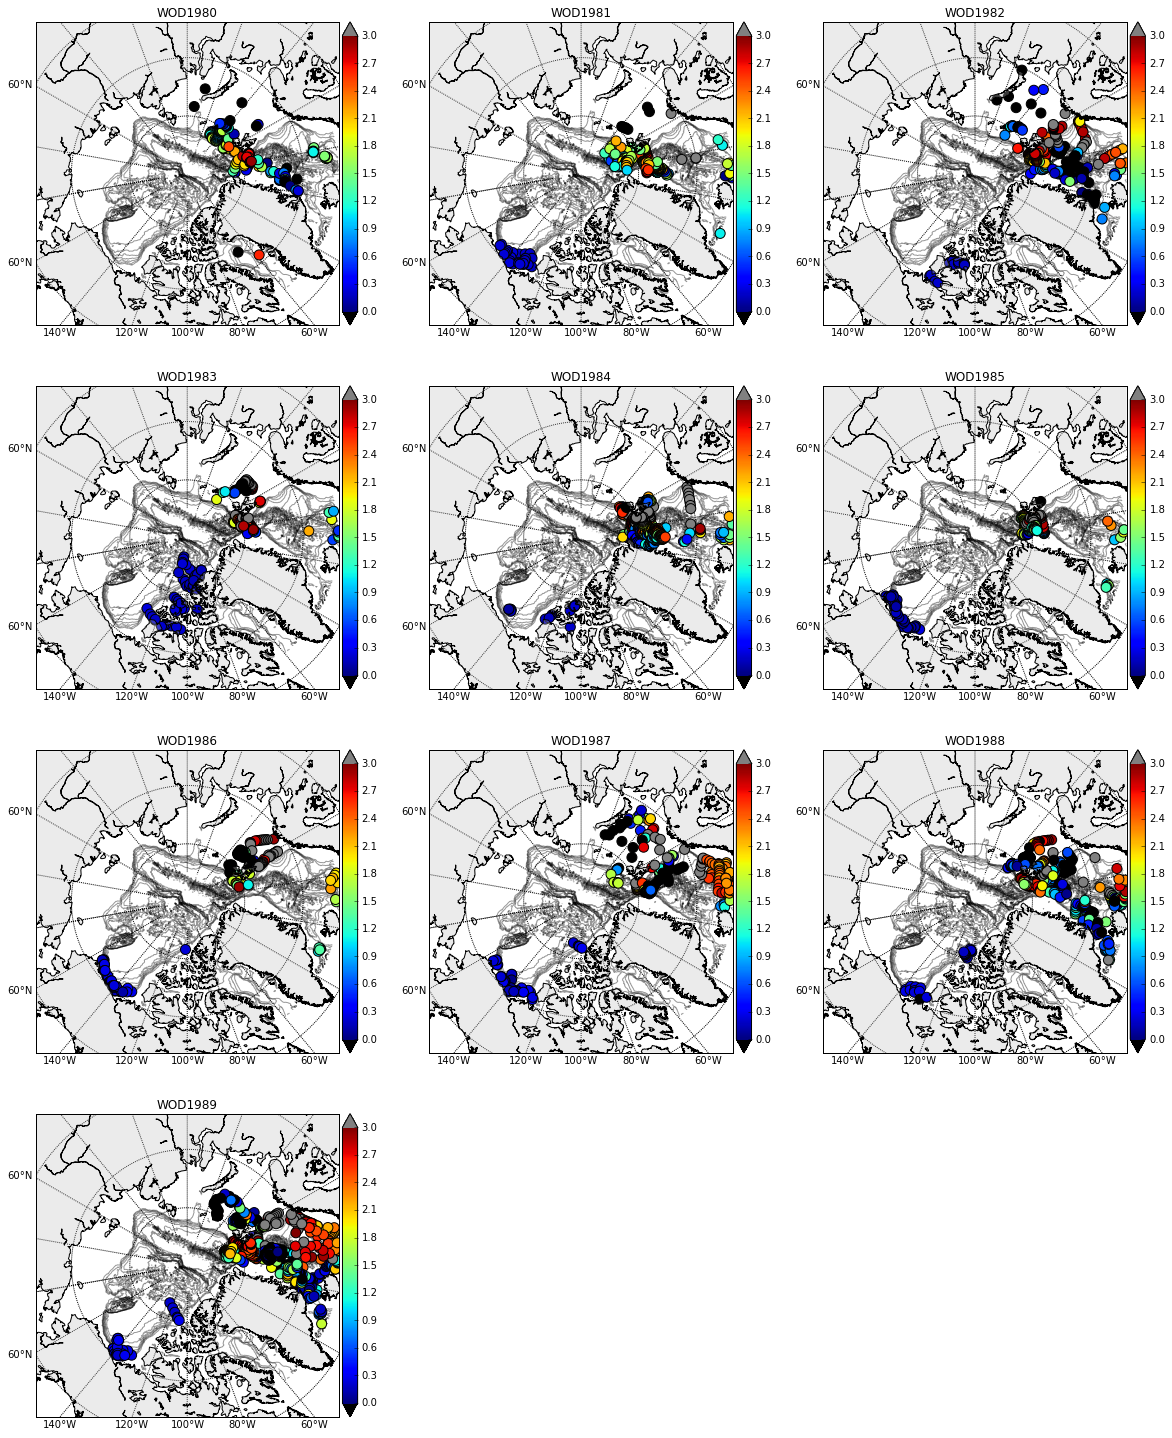

In [124]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12))=plt.subplots(4,3,facecolor='w',figsize=(20,25))

for pickledFile,axs in zip(('WOD1980','WOD1981','WOD1982','WOD1983','WOD1984','WOD1985','WOD1986','WOD1987',
                                'WOD1988','WOD1989'),
                               (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10)):
    axs.set_title(pickledFile)
    var = pd.read_pickle(directory+pickledFile)
    rho = var.rho
    t = var.temp
    
    lonlist = []
    ind = var.index.tolist()
    var_279 = pd.DataFrame()
    
    for i in range(0,len(var.Lon),1):
    #for i in range(0,30000,1):
        if var.Lon[ind[i]] not in lonlist:
            lonlist.append(var.Lon[ind[i]].tolist())
            var_lim=var[(rho > 27.895) & (rho < 27.905) & (var.Lon == lonlist[-1])]
        
            if (var_lim.rho.size == 1): 
                if(var_lim.rho.notnull().tolist()[0]):
                    var_279 = pd.concat([var_279,var_lim])
            if var_lim.rho.size > 1:
                find_closest = (var_lim.rho-27.9).abs().argsort()[:1]
                ind_closest = sum(find_closest.index.tolist(),find_closest.tolist())
                var_closest = var_lim[var_lim.index == ind_closest.tolist()]
                var_279 = pd.concat([var_279,var_closest])

#    var_279 = var_279[var_279.Cruise.notnull()]
    var_279
    
    ## Plot the temperature surface with basemap 
    
    m = Basemap(projection='npstere',boundinglat=64,lon_0=-100,resolution='l',ax=axs)
    m.drawcoastlines()
    m.fillcontinents(color = '0.75',alpha=0.3)
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0],zorder=-1)
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],latmax=85,zorder=-1)


    x_lon,y_lat = m(llon[9240:10801,:],llat[9240:10801,:])
    mp.rcParams['contour.negative_linestyle'] = 'solid'
    clevs = [-5000,-4500,-4000,-3500,-3000,-2500,-2000,-1500,-1000,-500]

    #plt.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='k',lw=0.1)
    Lon_279,Lat_279 = m(var_279.Lon.tolist(),var_279.Lat.tolist())
    m.contour(x_lon,y_lat,bathy_etopo[9240:10801,:],clevs,linewidth=0.075,colors='black',alpha=0.4,zorder=-1)
    sc=axs.scatter(Lon_279,Lat_279,c=var_279.temp.tolist(),s=100,vmin=0,vmax=3)
    divider = make_axes_locatable(axs)
    caxX = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(sc, cax=caxX, extend='both')
    cbar.cmap.set_under('black')
    cbar.cmap.set_over('grey')


    del var

ax11.axis('off');
ax12.axis('off');
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
#fig.colorbar(sc, cax=cbar_ax)

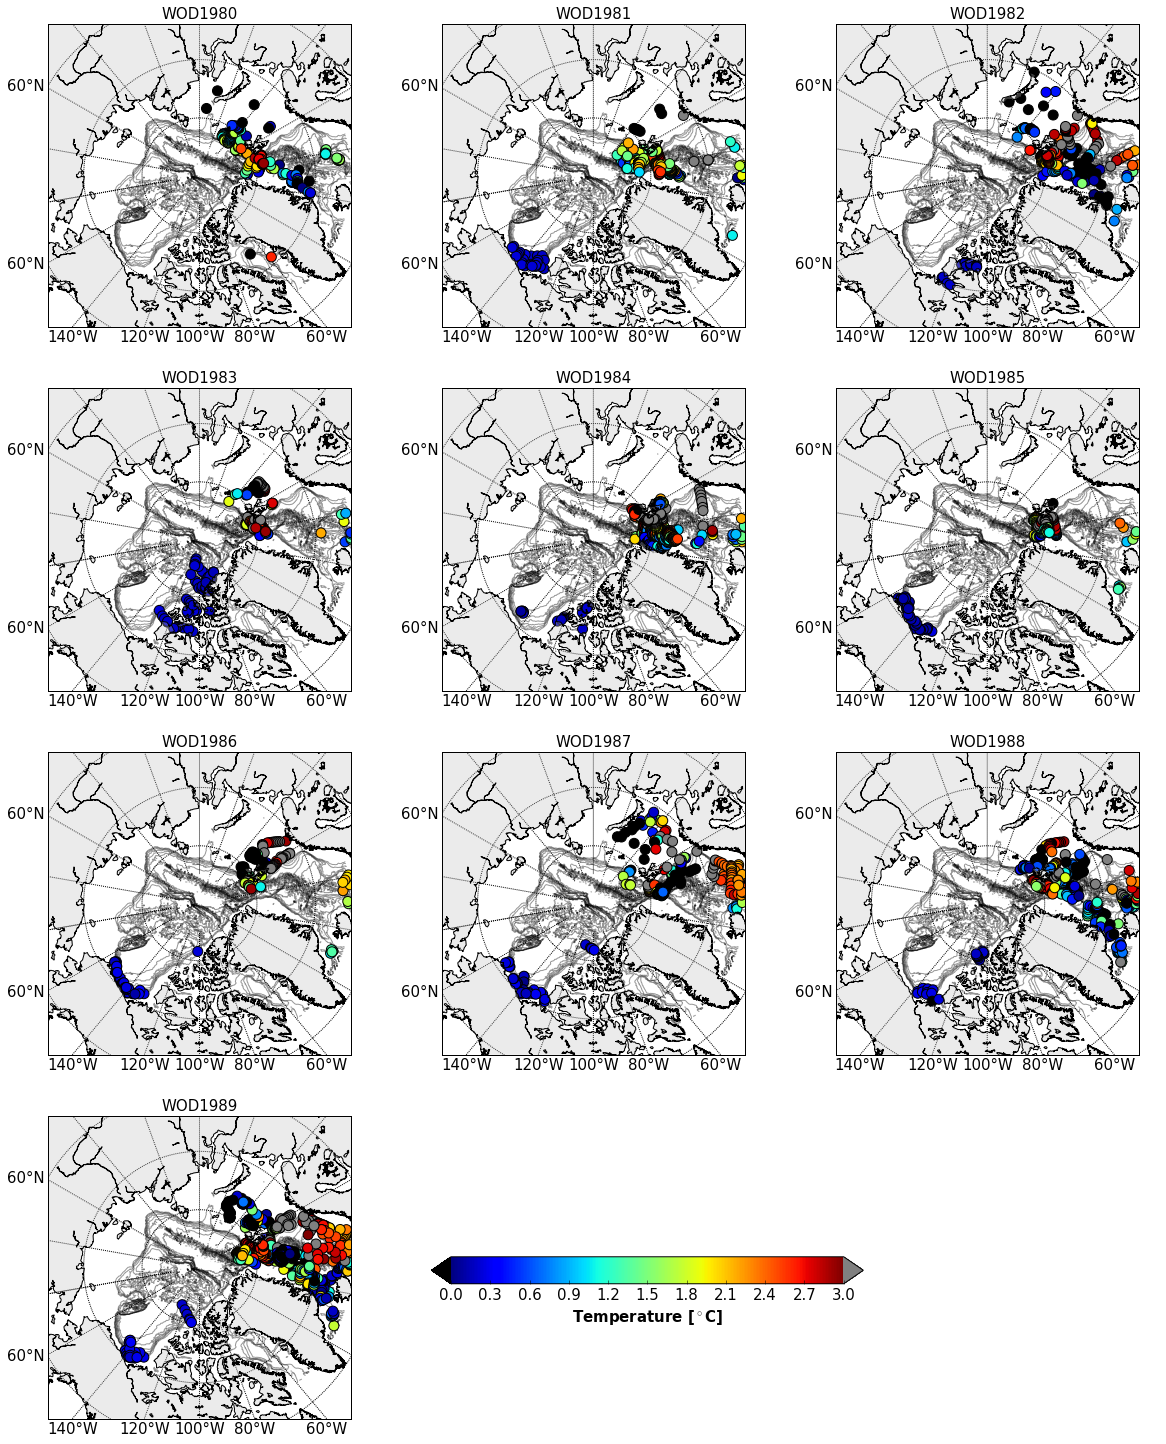

In [139]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12))=plt.subplots(4,3,facecolor='w',figsize=(20,25))

for var,pickledFile,axs in zip((WOD1980,WOD1981,WOD1982,WOD1983,WOD1984,WOD1985,WOD1986,WOD1987,WOD1988,WOD1989),
                               ('WOD1980','WOD1981','WOD1982','WOD1983','WOD1984','WOD1985','WOD1986','WOD1987',
                                'WOD1988','WOD1989'),
                               (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10)):
    axs.set_title(pickledFile, size = 15)
    var = pd.read_pickle(directory+pickledFile)
    rho = var.rho
    t = var.temp
    
    lonlist = []
    ind = var.index.tolist()
    var_279 = pd.DataFrame()
    
    for i in range(0,len(var.Lon),1):
    #for i in range(0,30000,1):
        if var.Lon[ind[i]] not in lonlist:
            lonlist.append(var.Lon[ind[i]].tolist())
            var_lim=var[(rho > 27.895) & (rho < 27.905) & (var.Lon == lonlist[-1])]
        
            if (var_lim.rho.size == 1): 
                if(var_lim.rho.notnull().tolist()[0]):
                    var_279 = pd.concat([var_279,var_lim])
            if var_lim.rho.size > 1:
                find_closest = (var_lim.rho-27.9).abs().argsort()[:1]
                ind_closest = sum(find_closest.index.tolist(),find_closest.tolist())
                var_closest = var_lim[var_lim.index == ind_closest.tolist()]
                var_279 = pd.concat([var_279,var_closest])

#    var_279 = var_279[var_279.Cruise.notnull()]
    var_279
    
    ## Plot the temperature surface with basemap 
    
    m = Basemap(projection='npstere',boundinglat=64,lon_0=-100,resolution='l',ax=axs)
    m.drawcoastlines()
    m.fillcontinents(color = '0.75',alpha=0.3)
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0],fontsize=15,zorder=-1)
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],fontsize=15,latmax=85,zorder=-1)


    x_lon,y_lat = m(llon[9240:10801,:],llat[9240:10801,:])
    mp.rcParams['contour.negative_linestyle'] = 'solid'
    clevs = [-5000,-4500,-4000,-3500,-3000,-2500,-2000,-1500,-1000,-500]

    #plt.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='k',lw=0.1)
    Lon_279,Lat_279 = m(var_279.Lon.tolist(),var_279.Lat.tolist())
    m.contour(x_lon,y_lat,bathy_etopo[9240:10801,:],clevs,linewidth=0.075,colors='black',alpha=0.4,zorder=-1)
    sc=axs.scatter(Lon_279,Lat_279,c=var_279.temp.tolist(),s=100,vmin=0,vmax=3)

    del var

ax11.axis('off');
ax12.axis('off');
cbar_ax = fig.add_axes([0.40, 0.2, 0.3, 0.015]) # Make an axis for the colorbar on the right side
cbar = plt.colorbar(sc, cax=cbar_ax, extend='both', label ='Temperature',orientation='horizontal') 
cbar.set_label(label='Temperature [$^\circ$C]',size=15,weight='bold')
cbar.ax.tick_params(labelsize=15)
cbar.cmap.set_under('black')
cbar.cmap.set_over('grey')

#cbar_ax = fig.add_axes([0.92, 0.1, 0.03, 0.8])
#fig.colorbar(sc, cax=cbar_ax)


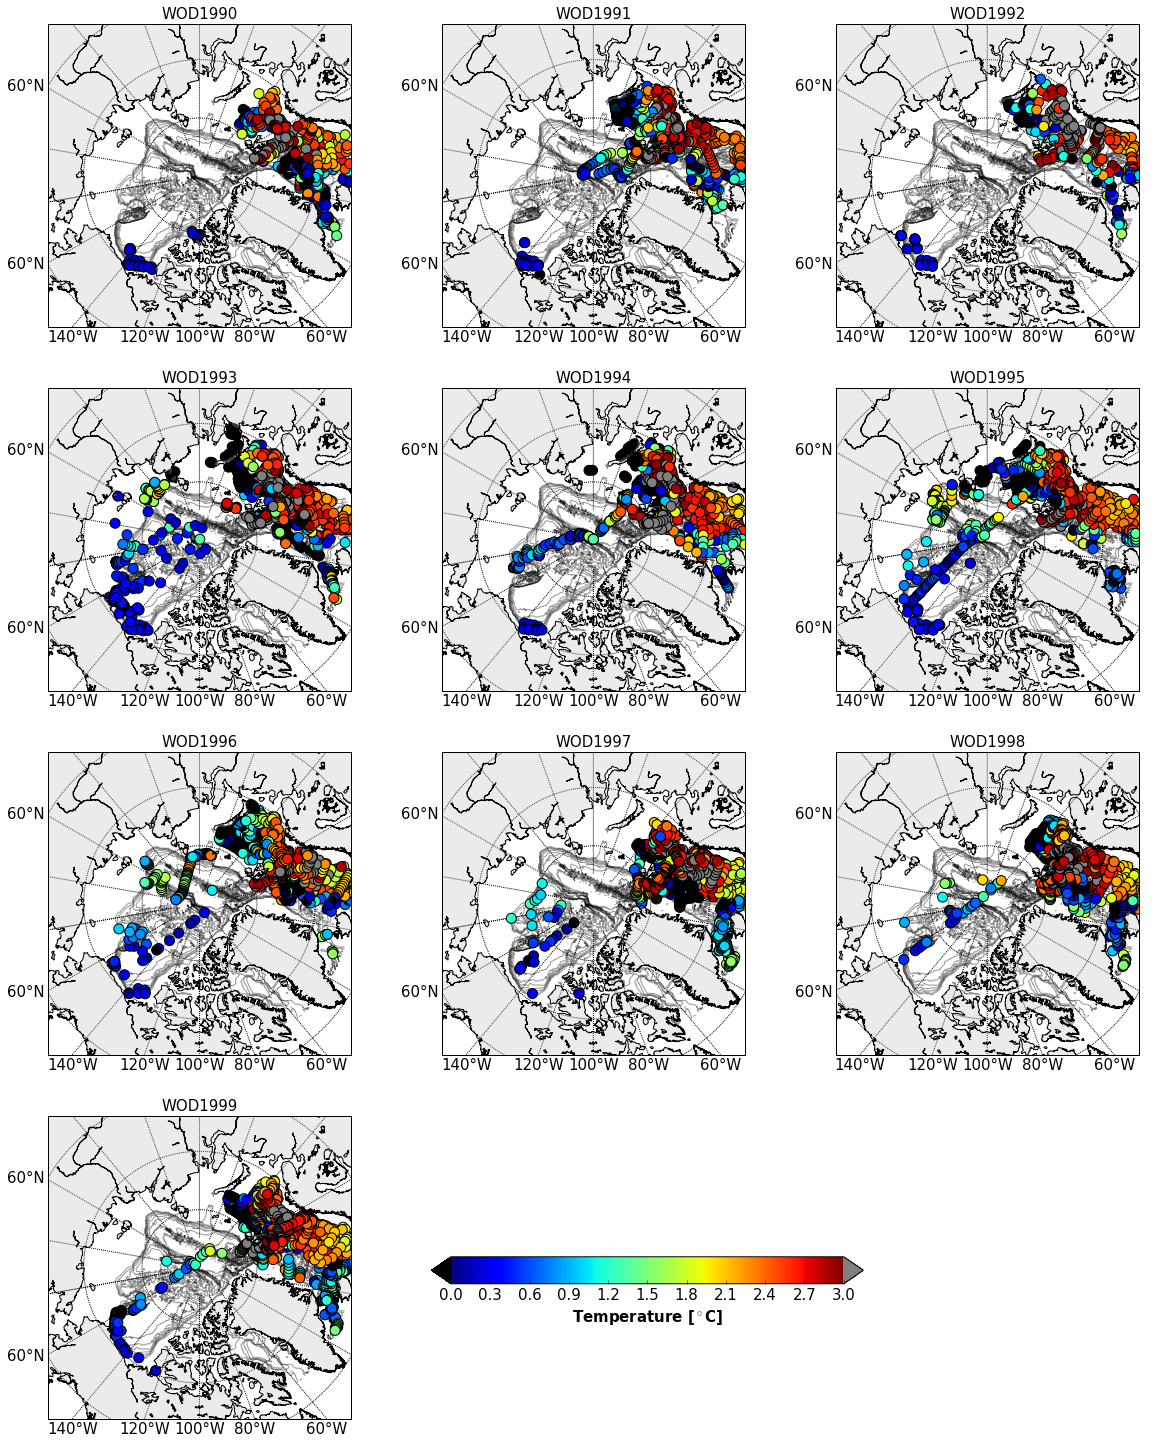

In [140]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12))=plt.subplots(4,3,facecolor='w',figsize=(20,25))

for var,pickledFile,axs in zip((WOD1990,WOD1991,WOD1992,WOD1993,WOD1994,WOD1995,WOD1996,WOD1997,WOD1998,WOD1999),
                               ('WOD1990','WOD1991','WOD1992','WOD1993','WOD1994','WOD1995','WOD1996','WOD1997',
                                'WOD1998','WOD1999'),
                               (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10)):
    axs.set_title(pickledFile, size = 15)
    var = pd.read_pickle(directory+pickledFile)
    rho = var.rho
    t = var.temp
    
    lonlist = []
    ind = var.index.tolist()
    var_279 = pd.DataFrame()
    
    for i in range(0,len(var.Lon),1):
    #for i in range(0,30000,1):
        if var.Lon[ind[i]] not in lonlist:
            lonlist.append(var.Lon[ind[i]].tolist())
            var_lim=var[(rho > 27.895) & (rho < 27.905) & (var.Lon == lonlist[-1])]
        
            if (var_lim.rho.size == 1): 
                if(var_lim.rho.notnull().tolist()[0]):
                    var_279 = pd.concat([var_279,var_lim])
            if var_lim.rho.size > 1:
                find_closest = (var_lim.rho-27.9).abs().argsort()[:1]
                ind_closest = sum(find_closest.index.tolist(),find_closest.tolist())
                var_closest = var_lim[var_lim.index == ind_closest.tolist()]
                var_279 = pd.concat([var_279,var_closest])

#    var_279 = var_279[var_279.Cruise.notnull()]
    var_279
    
    ## Plot the temperature surface with basemap 
    
    m = Basemap(projection='npstere',boundinglat=64,lon_0=-100,resolution='l',ax=axs)
    m.drawcoastlines()
    m.fillcontinents(color = '0.75',alpha=0.3)
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0],fontsize=15,zorder=-1)
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],fontsize=15,latmax=85,zorder=-1)


    x_lon,y_lat = m(llon[9240:10801,:],llat[9240:10801,:])
    mp.rcParams['contour.negative_linestyle'] = 'solid'
    clevs = [-5000,-4500,-4000,-3500,-3000,-2500,-2000,-1500,-1000,-500]

    #plt.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='k',lw=0.1)
    Lon_279,Lat_279 = m(var_279.Lon.tolist(),var_279.Lat.tolist())
    m.contour(x_lon,y_lat,bathy_etopo[9240:10801,:],clevs,linewidth=0.075,colors='black',alpha=0.4,zorder=-1)
    sc=axs.scatter(Lon_279,Lat_279,c=var_279.temp.tolist(),s=100,vmin=0,vmax=3)

    del var

ax11.axis('off');
ax12.axis('off');
cbar_ax = fig.add_axes([0.40, 0.2, 0.3, 0.015]) # Make an axis for the colorbar on the right side
cbar = plt.colorbar(sc, cax=cbar_ax, extend='both', label ='Temperature',orientation='horizontal') 
cbar.set_label(label='Temperature [$^\circ$C]',size=15,weight='bold')
cbar.ax.tick_params(labelsize=15)
cbar.cmap.set_under('black')
cbar.cmap.set_over('grey')


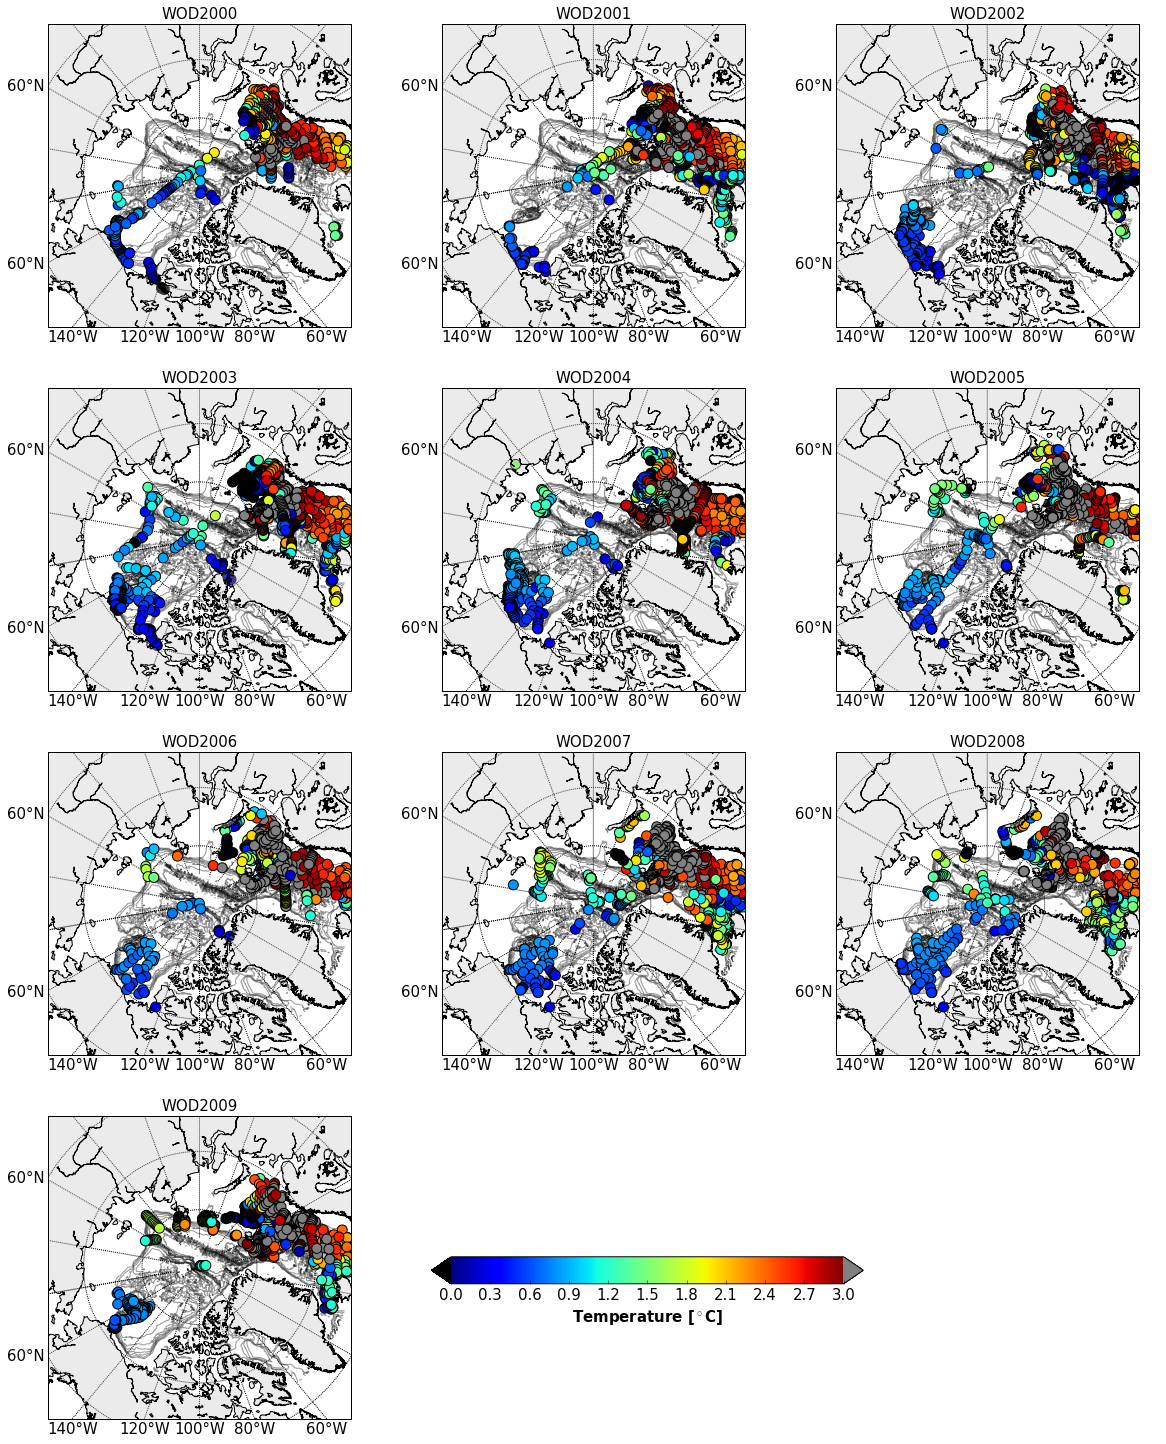

In [141]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12))=plt.subplots(4,3,facecolor='w',figsize=(20,25))

for var,pickledFile,axs in zip((WOD2000,WOD2001,WOD2002,WOD2003,WOD2004,WOD2005,WOD2006,WOD2007,WOD2008,WOD2009),
                               ('WOD2000','WOD2001','WOD2002','WOD2003','WOD2004','WOD2005','WOD2006','WOD2007',
                                'WOD2008','WOD2009'),
                               (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10)):
    axs.set_title(pickledFile, size = 15)
    var = pd.read_pickle(directory+pickledFile)
    rho = var.rho
    t = var.temp
    
    lonlist = []
    ind = var.index.tolist()
    var_279 = pd.DataFrame()
    
    for i in range(0,len(var.Lon),1):
    #for i in range(0,30000,1):
        if var.Lon[ind[i]] not in lonlist:
            lonlist.append(var.Lon[ind[i]].tolist())
            var_lim=var[(rho > 27.895) & (rho < 27.905) & (var.Lon == lonlist[-1])]
        
            if (var_lim.rho.size == 1): 
                if(var_lim.rho.notnull().tolist()[0]):
                    var_279 = pd.concat([var_279,var_lim])
            if var_lim.rho.size > 1:
                find_closest = (var_lim.rho-27.9).abs().argsort()[:1]
                ind_closest = sum(find_closest.index.tolist(),find_closest.tolist())
                var_closest = var_lim[var_lim.index == ind_closest.tolist()]
                var_279 = pd.concat([var_279,var_closest])

#    var_279 = var_279[var_279.Cruise.notnull()]
    var_279
    
    ## Plot the temperature surface with basemap 
    
    m = Basemap(projection='npstere',boundinglat=64,lon_0=-100,resolution='l',ax=axs)
    m.drawcoastlines()
    m.fillcontinents(color = '0.75',alpha=0.3)
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0],fontsize=15,zorder=-1)
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],fontsize=15,latmax=85,zorder=-1)


    x_lon,y_lat = m(llon[9240:10801,:],llat[9240:10801,:])
    mp.rcParams['contour.negative_linestyle'] = 'solid'
    clevs = [-5000,-4500,-4000,-3500,-3000,-2500,-2000,-1500,-1000,-500]

    #plt.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='k',lw=0.1)
    Lon_279,Lat_279 = m(var_279.Lon.tolist(),var_279.Lat.tolist())
    m.contour(x_lon,y_lat,bathy_etopo[9240:10801,:],clevs,linewidth=0.075,colors='black',alpha=0.4,zorder=-1)
    sc=axs.scatter(Lon_279,Lat_279,c=var_279.temp.tolist(),s=100,vmin=0,vmax=3)

    del var

ax11.axis('off');
ax12.axis('off');
cbar_ax = fig.add_axes([0.40, 0.2, 0.3, 0.015]) # Make an axis for the colorbar on the right side
cbar = plt.colorbar(sc, cax=cbar_ax, extend='both', label ='Temperature',orientation='horizontal') 
cbar.set_label(label='Temperature [$^\circ$C]',size=15,weight='bold')
cbar.ax.tick_params(labelsize=15)
cbar.cmap.set_under('black')
cbar.cmap.set_over('grey')


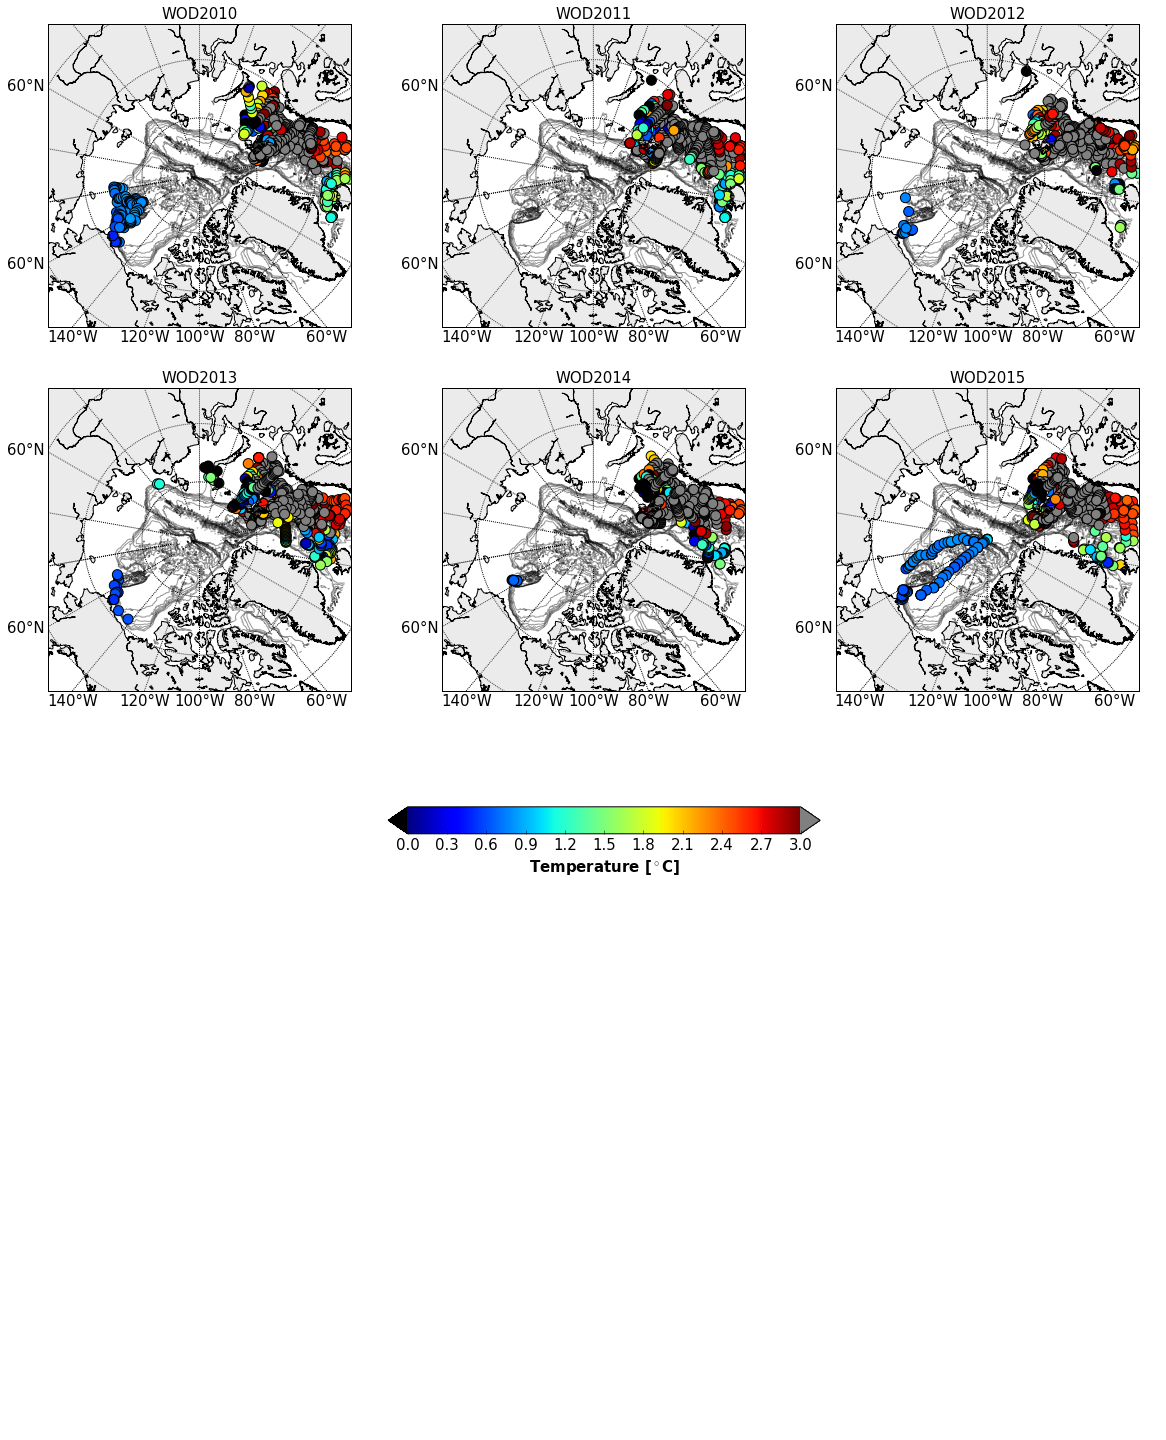

In [7]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12))=plt.subplots(4,3,facecolor='w',figsize=(20,25))

for var,pickledFile,axs in zip((WOD2010,WOD2011,WOD2012,WOD2013,WOD2014,WOD2015),
                               ('WOD2010','WOD2011','WOD2012','WOD2013','WOD2014','WOD2015'),
                               (ax1,ax2,ax3,ax4,ax5,ax6)):
    axs.set_title(pickledFile, size = 15)
    var = pd.read_pickle(directory+pickledFile)
    rho = var.rho
    t = var.temp
    
    lonlist = []
    ind = var.index.tolist()
    var_279 = pd.DataFrame()
    
    for i in range(0,len(var.Lon),1):
    #for i in range(0,30000,1):
        if var.Lon[ind[i]] not in lonlist:
            lonlist.append(var.Lon[ind[i]].tolist())
            var_lim=var[(rho > 27.895) & (rho < 27.905) & (var.Lon == lonlist[-1])]
        
            if (var_lim.rho.size == 1): 
                if(var_lim.rho.notnull().tolist()[0]):
                    var_279 = pd.concat([var_279,var_lim])
            if var_lim.rho.size > 1:
                find_closest = (var_lim.rho-27.9).abs().argsort()[:1]
                ind_closest = sum(find_closest.index.tolist(),find_closest.tolist())
                var_closest = var_lim[var_lim.index == ind_closest.tolist()]
                var_279 = pd.concat([var_279,var_closest])

    var_279
    
    ## Plot the temperature surface with basemap 
    
    m = Basemap(projection='npstere',boundinglat=64,lon_0=-100,resolution='l',ax=axs)
    m.drawcoastlines()
    m.fillcontinents(color = '0.75',alpha=0.3)
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0],fontsize=15,zorder=-1)
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],fontsize=15,latmax=85,zorder=-1)


    x_lon,y_lat = m(llon[9240:10801,:],llat[9240:10801,:])
    mp.rcParams['contour.negative_linestyle'] = 'solid'
    clevs = [-5000,-4500,-4000,-3500,-3000,-2500,-2000,-1500,-1000,-500]

    #plt.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='k',lw=0.1)
    Lon_279,Lat_279 = m(var_279.Lon.tolist(),var_279.Lat.tolist())
    m.contour(x_lon,y_lat,bathy_etopo[9240:10801,:],clevs,linewidth=0.075,colors='black',alpha=0.4,zorder=-1)
    sc=axs.scatter(Lon_279,Lat_279,c=var_279.temp.tolist(),s=100,vmin=0,vmax=3)

    del var

cbar_ax = fig.add_axes([0.37, 0.45, 0.3, 0.015]) # Make an axis for the colorbar on the right side
cbar = plt.colorbar(sc, cax=cbar_ax, extend='both', label ='Temperature',orientation='horizontal') 
cbar.set_label(label='Temperature [$^\circ$C]',size=15,weight='bold')
cbar.ax.tick_params(labelsize=15)
cbar.cmap.set_under('black')
cbar.cmap.set_over('grey')

#cbar_ax = fig.add_axes([0.92, 0.1, 0.03, 0.8])
#fig.colorbar(sc, cax=cbar_ax)
for ax in (ax7,ax8,ax9,ax10,ax11,ax12):
    ax.axis('off');


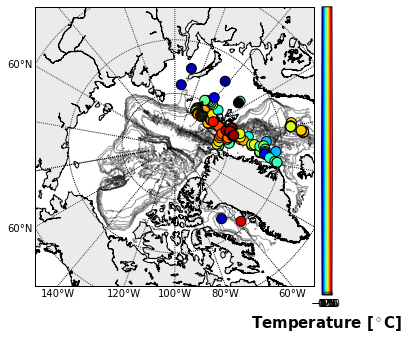

In [137]:
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(5,5))
directory = '/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/'
var = pd.read_pickle(directory+'WOD1980')
rho = var.rho
t = var.temp

lonlist = []
ind = var.index.tolist()
var_279 = pd.DataFrame()
for i in range(0,len(var.Lon),1):
#for i in range(0,30000,1):
    if var.Lon[ind[i]] not in lonlist:
        lonlist.append(var.Lon[ind[i]].tolist())
        var_lim=var[(rho > 27.895) & (rho < 27.905) & (var.Lon == lonlist[-1])]
        
        if (var_lim.rho.size == 1): 
            if(var_lim.rho.notnull().tolist()[0]):
                var_279 = pd.concat([var_279,var_lim])
        if var_lim.rho.size > 1:
                find_closest = (var_lim.rho-27.9).abs().argsort()[:1]
                ind_closest = sum(find_closest.index.tolist(),find_closest.tolist())
                var_closest = var_lim[var_lim.index == ind_closest.tolist()]
                var_279 = pd.concat([var_279,var_closest])


#var_279 = var_279[var_279.Cruise.notnull()]
var_279
    
## Plot the temperature surface with basemap 

m = Basemap(projection='npstere',boundinglat=64,lon_0=-100,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75',alpha=0.3)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0],fontsize=10,zorder=-1)
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],latmax=85,fontsize=10,zorder=-1)


x_lon,y_lat = m(llon[9240:10801,:],llat[9240:10801,:])
mp.rcParams['contour.negative_linestyle'] = 'solid'
clevs = [-5000,-4500,-4000,-3500,-3000,-2500,-2000,-1500,-1000,-500]

#plt.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='k',lw=0.1)
Lon_279,Lat_279 = m(var_279.Lon.tolist(),var_279.Lat.tolist())
m.contour(x_lon,y_lat,bathy_etopo[9240:10801,:],clevs,linewidth=0.075,colors='black',alpha=0.4,zorder=-1)
sc=ax.scatter(Lon_279,Lat_279,c=var_279.temp.tolist(),s=100,vmin=-1.8,vmax=3)
'''
divider = make_axes_locatable(ax)
caxX = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(sc, cax=caxX, extend='both')
cbar.cmap.set_under('black')
cbar.cmap.set_over('grey')
'''
cbar_ax = fig.add_axes([0.92, 0.1, 0.03, 0.8]) # Make an axis for the colorbar on the right side
cbar = plt.colorbar(sc, cax=cbar_ax, extend='both')
cbar.set_label(label='Temperature [$^\circ$C]',size=15,weight='bold')
cbar.ax.tick_params(labelsize=10)
cbar.cmap.set_under('black')
cbar.cmap.set_over('grey')
